In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numba import jit
from numba import cuda
import numba
import time
import multiprocessing as mp
import matplotlib.font_manager as font_manager
import sys
from tqdm import tqdm
import scipy.io as scio
import seaborn as sns

In [23]:
def generated_noraml_node_removing_ratio(gmv_y = 717.402647, gmv_e = 602.625714, y_mu = 0.001, sd = 0.003, trails =30):
    gmv_diff = (gmv_y - gmv_e)/gmv_y
    node_removed_limit = 0.00495
    y_mu =  y_mu
    e_mu =  y_mu*(1 - gmv_diff)
    sd = sd
    trails = 30
    y_removed_ratio = []
    e_removed_ratio = []
    y, e = 1,1
    for i in range(trails):
      while y > node_removed_limit or y in y_removed_ratio or y < 0 :
        y = np.random.normal(y_mu, sd, 1)[0]
#         print(y)
      while e > node_removed_limit or e in e_removed_ratio or e < 0 :
        e = np.random.normal(e_mu, sd, 1)[0]
#       print(y, e)
      y_removed_ratio.append(y)
      e_removed_ratio.append(e)
    return y_removed_ratio, e_removed_ratio

def generated_normal_conn_ration(int_y = 1.1364, int_e = 0.8263, y_int_mu = 1, sd = 0.1):
    int_diff = (int_y-int_e)/int_y
    y_int_mu = y_int_mu
    e_int_mu = y_int_mu*(1-int_diff)
    sd = sd
    trails = 30
    y_conn_difference = []
    e_conn_difference = []
    yint, eint = 10,10
    for i in range(trails):
      while yint > 1 or yint in y_conn_difference or yint < 0.6 :
        yint = np.random.normal(y_int_mu, sigma, 1)[0]
      while eint > 1 or eint in e_conn_difference or eint < 0.6 :
        eint = np.random.normal(e_int_mu, sigma, 1)[0]
      print(yint, eint)
      y_conn_difference.append(yint)
      e_conn_difference.append(eint)
    return y_conn_difference, e_conn_difference

In [5]:
def generated_normal_conn_ration(int_y = 1.1364, int_e = 0.8263, y_int_mu = 1, sd = 0.1,trails = 30):

    int_diff = (int_y-int_e)/int_y
    y_int_mu = y_int_mu
    e_int_mu = y_int_mu*(1 - int_diff)
    sd = sd 
    trails = trails
    y_conn_difference = []
    e_conn_difference = []
    yint, eint = 10,10
    for i in range(trails):
      # print(np.random.normal(y_mu, sigma, 1))
      while yint > 1 or yint in y_conn_difference or yint < 0.6 :
        yint = np.random.normal(y_int_mu, sd, 1)[0]
      while eint > 1 or eint in e_conn_difference or eint < 0.6 :
        eint = np.random.normal(e_int_mu, sd, 1)[0]
      print(yint, eint)
      y_conn_difference.append(yint)
      e_conn_difference.append(eint)
    return y_conn_difference,e_conn_difference

In [11]:
# y_conn_difference,e_conn_difference = generated_normal_conn_ration(trails = 100)

In [12]:
n_subj = 100
y_conn_difference,e_conn_difference = generated_normal_conn_ration(trails = 100)
print(y_conn_difference)
print(e_conn_difference)
Subj = ['Young']*n_subj+['Elderly']*n_subj
int_difference = y_conn_difference + e_conn_difference
# int_leftconn = [1000000-int(i) for i in np.array(y_conn_difference + e_conn_difference)*1000000]
int_diff_dict = {}
int_diff_dict['Group'] = Subj
int_diff_dict['int_sigma_diff'] = int_difference
int_diff_dict['Connections'] = [int(i*1000000) for i in int_difference]
int_diff_df = pd.DataFrame(int_diff_dict)
int_diff_df.to_csv(f'Aging_network/gmv_rnode/int_diff_df_{n_subj}.csv')

0.992575716165185 0.602665224011781
0.9415263035772531 0.6237233365961797
0.933406309694358 0.7593399790694427
0.9402569671940001 0.7785947289936096
0.9949380783562669 0.6970382258360939
0.9543617590151882 0.8824696768471209
0.9188332254298283 0.8056401107551584
0.9606924672798881 0.7023352155653569
0.904184384929305 0.7116888561022084
0.8836912309466197 0.8935324396932292
0.921335522961328 0.7291135799428091
0.8879038025320768 0.7679529216267873
0.9956563759432507 0.8112175814880537
0.9921649294326118 0.7049544007632641
0.9596304074675874 0.7787574127209209
0.9467367973717377 0.7192272825248315
0.9294666993023103 0.8373694464636221
0.9205918536777621 0.6266522084219401
0.7894482126741857 0.7757918572637321
0.985197209132641 0.7451986759704767
0.9517520767303809 0.7921209590808502
0.9875908008069973 0.787090227312209
0.9752559800411571 0.7956682321849543
0.8468700329224388 0.8314565769417126
0.7944351714010907 0.8652294039609653
0.7787208257937517 0.6313109457485988
0.8717162715754802 

In [98]:
# n_subj = 100
# intt_diff_df = pd.read_csv(f'Aging_network/gmv_rnode/int_diff_df_{n_subj}.csv')
intt_diff_df = pd.read_csv(f'aging_network/int_diff_df.csv')
gmv_diff_df = pd.read_csv('Aging_network/gmv_rnode/gmv_diff_df_100.csv')

In [88]:
gmv_diff_df['GMV_nodes'] = gmv_diff_df['GMV_nodes']*0.01

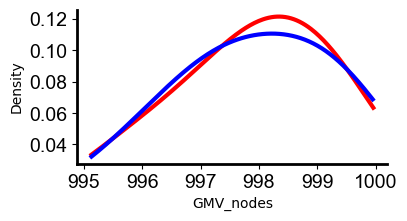

In [89]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.kdeplot(data = gmv_diff_df, x= "GMV_nodes", hue="Group", palette = ['blue','red'],linewidth= 3, bw_adjust = 2, cut = 0,legend = False)
# ax.set_xlabel('Neurons',fontsize= 18, family = 'Arial')
# ax.set_ylabel('Density',fontsize= 18, family = 'Arial')
bwith = 2
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
font_prop = font_manager.FontProperties(size = 14, family = 'Arial')

# plt.gca().set_xticks([])
plt.xticks(fontsize= 14, family = 'Arial')
plt.yticks(fontsize= 14, family = 'Arial')
# ax.set_xticks([])
# ax.set_yticks([])
plt.savefig("noraml_node_diff.png", bbox_inches='tight', pad_inches= 0, dpi = 100)

In [99]:
intt_diff_df['int_sigma_diff'] = intt_diff_df['int_sigma_diff']*100

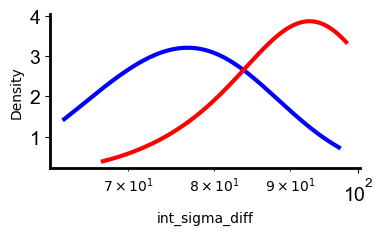

In [100]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.kdeplot(data= intt_diff_df, x="int_sigma_diff", hue="Group",log_scale=True, palette = ['red','blue'],linewidth= 3, bw_adjust = 2, cut = 0,legend = False)
# ax.set_xlabel('Neurons',fontsize= 18, family = 'Arial')
# ax.set_ylabel('Density',fontsize= 18, family = 'Arial')
bwith = 2
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
font_prop = font_manager.FontProperties(size = 14, family = 'Arial')

# plt.gca().set_xticks([])
plt.xticks(fontsize= 14, family = 'Arial')
plt.yticks(fontsize= 14, family = 'Arial')
# ax.set_xticks([])
# ax.set_yticks([])

plt.savefig("noraml_conn_diff.png",bbox_inches='tight', pad_inches=0, dpi=100)